<a href="https://colab.research.google.com/github/Dannapaola1225/ejercicios1/blob/main/Polinomio%20Interpolante%20de%20Newton%20con%20Sympy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Polinomio Interpolante de Newton con Sympy***

In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [10]:
#Calcular el polinomio de interpolación de Newton.
def interpolacion_newton(x_values, y_values):

    x = sp.symbols('x')  # Variable simbólica
    n = len(x_values)  # Número de puntos
    diff_table = y_values[:]  # Inicializar tabla de diferencias
    poly = 0  # Polinomio inicial
    term = 1  # Término acumulativo para el polinomio

    # Construir el polinomio
    for i in range(n):
        poly += diff_table[0] * term
        term *= (x - x_values[i])  # Actualizar el término acumulativo
        diff_table = [(diff_table[j + 1] - diff_table[j]) / (x_values[j + i + 1] - x_values[j]) for j in range(len(diff_table) - 1)]

    return sp.simplify(poly)


In [11]:
#Calcula las diferencias sucesivas de un conjunto de valores F.
def calcular_diferencias_sucesivas(F):
    diferencias = [np.diff(F)]  # Inicializar con la primera diferencia
    while True:
        dif_actual = np.diff(diferencias[-1])  # Calcular la siguiente diferencia
        diferencias.append(dif_actual)
        if np.all(dif_actual == dif_actual[0]):
            break
    return diferencias

In [12]:
#Calcula la tabla de diferencias divididas.
def diferencias_divididas(x, F):

    n = len(x)
    tabla = np.zeros((n, n))
    tabla[:, 0] = F
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])
    return tabla

In [ ]:
#Evalúa el polinomio de Newton en un punto dado.
def polinomio_newton(x_dado, x, tabla):
    n = len(x)
    resultado = tabla[0, 0]
    producto = 1
    for i in range(1, n):
        producto *= (x_dado - x[i - 1])
        resultado += tabla[0, i] * producto
    return resultado

In [13]:
#Genera un gráfico con los puntos dados y la función opcional.
def graficar(x, F, funcion=None):
    plt.scatter(x, F, marker='x', color="purple", label="Puntos dados")
    if funcion:
        x1 = np.linspace(min(x), max(x), 500)
        plt.plot(x1, funcion(x1), color="green", label="Polinomio")
    for xi, fi in zip(x, F):
        plt.annotate(f'({xi},{fi})', (xi, fi))
    plt.grid(color="black", linestyle="--")
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()
    plt.show()

Ingrese los valores de X separados por comas: 0, 1, 2, 3, 4, 5
Ingrese los valores de F separados por comas: -5, 1, 9, 25, 55, 105

Diferencias sucesivas:
Δ1: [ 6.  8. 16. 30. 50.]
Δ2: [ 2.  8. 14. 20.]
Δ3: [6. 6. 6.]

Tabla de diferencias divididas:
0.0       -5.00000   6.00000    1.00000    1.00000    0.00000    0.00000   
1.0       1.00000    8.00000    4.00000    1.00000    0.00000   
2.0       9.00000    16.00000   7.00000    1.00000   
3.0       25.00000   30.00000   10.00000  
4.0       55.00000   50.00000  
5.0       105.00000 

Polinomio de Newton:
1.0*x**3 - 2.0*x**2 + 7.0*x - 5.0

Ingrese el valor de x para evaluar el polinomio: 3

El polinomio de Newton evaluado en x = 3.0 es: 25.00000


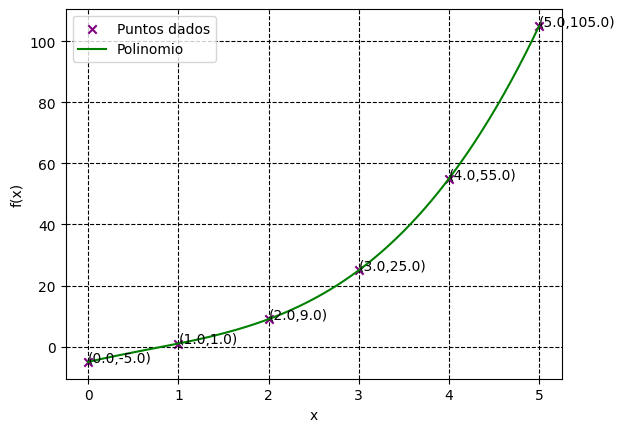

In [14]:
if __name__ == "__main__":
    # Entrada de datos
    X = np.array([float(x) for x in input("Ingrese los valores de X separados por comas: ").split(",")])
    F = np.array([float(f) for f in input("Ingrese los valores de F separados por comas: ").split(",")])

    # Mostrar diferencias sucesivas
    diferencias = calcular_diferencias_sucesivas(F)
    print("\nDiferencias sucesivas:")
    for idx, dif in enumerate(diferencias, start=1):
        print(f"\u0394{idx}: {dif}")

    # Calcular diferencias divididas y mostrar tabla
    tabla_dif = diferencias_divididas(X, F)
    print("\nTabla de diferencias divididas:")
    for i in range(len(X)):
        print(f"{X[i]:<10}" + " ".join([f"{tabla_dif[i, j]:<10.5f}" for j in range(len(X) - i)]))

    #imprimir polinomio
    print("\nPolinomio de Newton:")
    print(interpolacion_newton(X, F))
    # Evaluar polinomio en un punto dado
    xi = float(input("\nIngrese el valor de x para evaluar el polinomio: "))
    resultado = polinomio_newton(xi, X, tabla_dif)
    print(f"\nEl polinomio de Newton evaluado en x = {xi} es: {resultado:.5f}")

    # Graficar los puntos y el polinomio
    graficar(X, F, funcion=f)
